In [1]:
import uproot
import pandas as pd
import numpy as np
import awkward as ak

In [2]:
sig = uproot.open('/Users/chawla19/Topbjets/Bdecays/minitree_ttbarbdecays_UL2018.root:tree1')
bkg = uproot.open('/Users/chawla19/Topbjets/Bdecays/minitree_ttbarbdecays_UL2018.root:tree2')

In [3]:
sig_df = sig.arrays(("lxy_D0","lxysig_D0","ct_D0","chi2_D0","mass_lepD0"), library="pd")
sig_df = sig_df.reset_index(level='subentry', drop=True)
sig_df.reset_index(level='entry', drop=True)

lxy_D0  lxysig_D0     ct_D0   chi2_D0  mass_lepD0
0       0.968794  35.337384  0.059954  7.529874    3.492455
1       0.287592  21.951007  0.045924  1.221320    2.675219
2       2.002023  89.892407  0.071080  2.083788    3.754149
3       1.009819  67.167504  0.086645  0.888467    3.147089
4       0.296246  31.375074  0.049038  0.800441    3.115516
...          ...        ...       ...       ...         ...
100561  0.233670  11.116243  0.012654  1.061769    3.263933
100562  0.276659  14.971801  0.052428  0.355532    3.396138
100563  0.412289  12.748987  0.022798  6.731997    3.321962
100564  3.070769  58.674233  0.064865  2.320265    4.226559
100565  0.510810  38.676669  0.033257  0.026634    3.536002

[100566 rows x 5 columns]

In [4]:
bkg_df = bkg.arrays(("lxy_D0","lxysig_D0","ct_D0","chi2_D0","mass_lepD0"), library="pd")
bkg_df = bkg_df.reset_index(level='subentry', drop=True)
bkg_df.reset_index(level='entry', drop=True)

lxy_D0  lxysig_D0     ct_D0   chi2_D0  mass_lepD0
0     0.078366   6.272902  0.021942  0.514307    3.701266
1     0.930197  35.595523  0.035928  2.352106    3.764705
2     0.089415   4.602728  0.008202  4.586267    4.301862
3     0.148472   9.221735  0.043513  2.412991    4.125004
4     1.298763  12.770316  0.029474  4.584049    3.822619
...        ...        ...       ...       ...         ...
6465  0.617950  19.156408  0.042210  5.340754    3.598716
6466  3.674790  93.965042  0.082737  2.925556    4.711404
6467  1.585658  52.345989  0.042120  1.525227    2.814587
6468  0.818384  11.591967  0.017382  7.038860    4.403218
6469  1.559530  76.640988  0.133801  0.578714    3.506479

[6470 rows x 5 columns]

In [5]:
df = pd.concat([sig_df, bkg_df], ignore_index=True)

In [6]:
df

lxy_D0  lxysig_D0     ct_D0   chi2_D0  mass_lepD0
0       0.968794  35.337384  0.059954  7.529874    3.492455
1       0.287592  21.951007  0.045924  1.221320    2.675219
2       2.002023  89.892407  0.071080  2.083788    3.754149
3       1.009819  67.167504  0.086645  0.888467    3.147089
4       0.296246  31.375074  0.049038  0.800441    3.115516
...          ...        ...       ...       ...         ...
107031  0.617950  19.156408  0.042210  5.340754    3.598716
107032  3.674790  93.965042  0.082737  2.925556    4.711404
107033  1.585658  52.345989  0.042120  1.525227    2.814587
107034  0.818384  11.591967  0.017382  7.038860    4.403218
107035  1.559530  76.640988  0.133801  0.578714    3.506479

[107036 rows x 5 columns]

In [7]:
mean = df.mean()
std = df.std()
df = (df - mean)/std

In [8]:
sig_label = np.ones(len(sig_df.values))
bkg_label = np.zeros(len(bkg_df.values))
label = np.concatenate([sig_label,bkg_label])
df['label'] = label
df = df.sample(frac=1)

In [9]:
df

lxy_D0  lxysig_D0     ct_D0   chi2_D0  mass_lepD0  label
11678 -0.464831  -0.557118 -0.575931 -0.003057    0.003559    1.0
9117  -0.806040  -0.793179 -0.855953 -0.003057   -0.007549    1.0
19254 -0.537067  -0.686542 -0.830898 -0.003057   -0.005893    1.0
22751  0.201015  -0.415355 -0.006819 -0.003057   -0.004425    1.0
55734 -0.503828  -0.105115 -0.337763 -0.003057   -0.000121    1.0
...         ...        ...       ...       ...         ...    ...
31858 -0.373658  -0.147481  0.283398 -0.003057    0.000396    1.0
92697 -0.321184   0.020313  0.558651 -0.003057   -0.002440    1.0
74971 -0.760702  -0.750897 -0.706539 -0.003057    0.002315    1.0
71651 -0.426829  -0.592566 -0.676289 -0.003057    0.001968    1.0
58252 -0.135013  -0.087365 -0.293938 -0.003057   -0.001217    1.0

[107036 rows x 6 columns]

In [10]:
train_len = int(0.5*len(df))
df_train = df[1:train_len]
df_test = df[train_len:]

In [11]:
x_train = df_train[["lxy_D0","lxysig_D0","ct_D0","chi2_D0","mass_lepD0"]]
y_train = df_train["label"]

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(5, input_shape=(5,), activation='relu')) #input layer
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) #output layer
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 30        
                                                                 
 dropout_3 (Dropout)         (None, 5)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


In [25]:
hist = model.fit(x_train, y_train, batch_size=50, epochs=10, verbose=1, shuffle=True, validation_split=0.20)

Epoch 1/10
857/857 [==============================] - 1s 1ms/step - loss: 0.4048 - accuracy: 0.8790 - val_loss: 0.2373 - val_accuracy: 0.9434
Epoch 2/10
857/857 [==============================] - 1s 1ms/step - loss: 0.2596 - accuracy: 0.9383 - val_loss: 0.2183 - val_accuracy: 0.9435
Epoch 3/10
857/857 [==============================] - 1s 1ms/step - loss: 0.2444 - accuracy: 0.9390 - val_loss: 0.2166 - val_accuracy: 0.9435
Epoch 4/10
857/857 [==============================] - 1s 1ms/step - loss: 0.2391 - accuracy: 0.9391 - val_loss: 0.2156 - val_accuracy: 0.9434
Epoch 5/10
857/857 [==============================] - 1s 1ms/step - loss: 0.2356 - accuracy: 0.9391 - val_loss: 0.2161 - val_accuracy: 0.9434
Epoch 6/10
857/857 [==============================] - 1s 1ms/step - loss: 0.2337 - accuracy: 0.9390 - val_loss: 0.2153 - val_accuracy: 0.9434
Epoch 7/10
857/857 [==============================] - 1s 1ms/step - loss: 0.2316 - accuracy: 0.9391 - val_loss: 0.2150 - val_accuracy: 0.9434
Epoch 

In [26]:
import matplotlib.pyplot as plt
def show_losses(histories):
    plt.figure(figsize=(5,5))
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss' , fontsize=12)
    plt.tick_params(axis="y", labelsize=12)
    plt.tick_params(axis="x", labelsize=12)
    plt.title('Cross Entropy Loss by Epoch', fontsize=10)
    color='C0'
    do_acc=False
    for label,loss in histories:
        #color = tuple(np.random.random(3))
        #colors.append(color)
        l = 'Training set loss'
        vl= 'Validation set loss'
        if 'accuracy' in loss.history:
            l+=' (acc %2.4f)'% (loss.history['accuracy'][-1])
            do_acc = True
        if 'val_accuracy' in loss.history:
            vl+=' (val acc %2.4f)'% (loss.history['val_accuracy'][-1])
            do_acc = True
        plt.plot(loss.history['loss'], label=l, color='C0')
        if 'val_loss' in loss.history:
            plt.plot(loss.history['val_loss'], lw=2, ls='dashed', label=vl, color='C0')

    plt.legend(fontsize=9)
    #plt.yscale('log')
    plt.show()
    
    if not do_acc: return
    plt.figure(figsize=(5,5))
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy' , fontsize=12)
    plt.tick_params(axis="y", labelsize=12)
    plt.tick_params(axis="x", labelsize=12)
    for i,(label,loss) in enumerate(histories):
        #color = colors[i]
        if 'accuracy' in loss.history:
            plt.plot(loss.history['accuracy'], lw=2, label=label+" accuracy", color=color)
        if 'val_accuracy' in loss.history:
            plt.plot(loss.history['val_accuracy'], lw=2, ls='dashed', label=label+" validation accuracy", color=color)
    plt.legend(fontsize=9)
    plt.show()

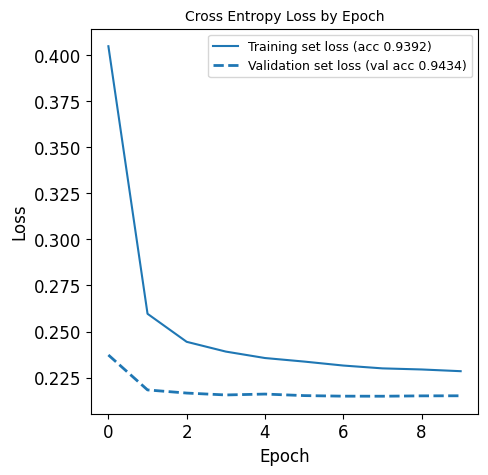

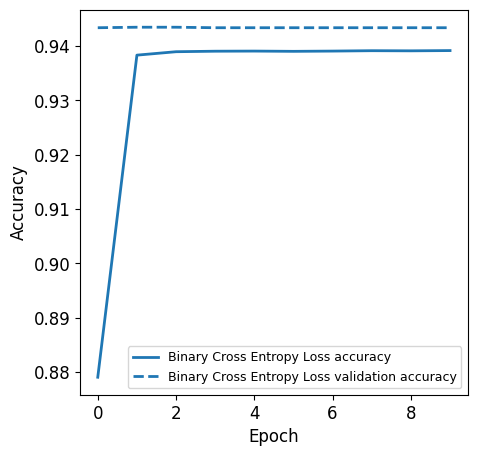

In [27]:
show_losses( [("Binary Cross Entropy Loss", hist)])